<a href="https://colab.research.google.com/github/leobioinf0/Sampling/blob/main/S06_T01_Tasca_metodes_de_mostreig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nivell 1
- Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from imblearn.over_sampling import SMOTE

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
df = pd.read_csv('/content/athlete_events.csv', encoding='utf8')
df = df[['Sex', 'Height', 'Weight']]
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Sex,Height,Weight
0,M,180.0,80.0
1,M,170.0,60.0
2,F,185.0,82.0
3,F,185.0,82.0
4,F,185.0,82.0


In [ ]:
df.describe().round()

,Height,Weight
count,206853.0,206853.0
mean,175.0,71.0
std,11.0,14.0
min,127.0,25.0
25%,168.0,60.0
50%,175.0,70.0
75%,183.0,79.0
max,226.0,214.0


Sex distribution in %
M    67.740859
F    32.259141
Name: Sex, dtype: float64




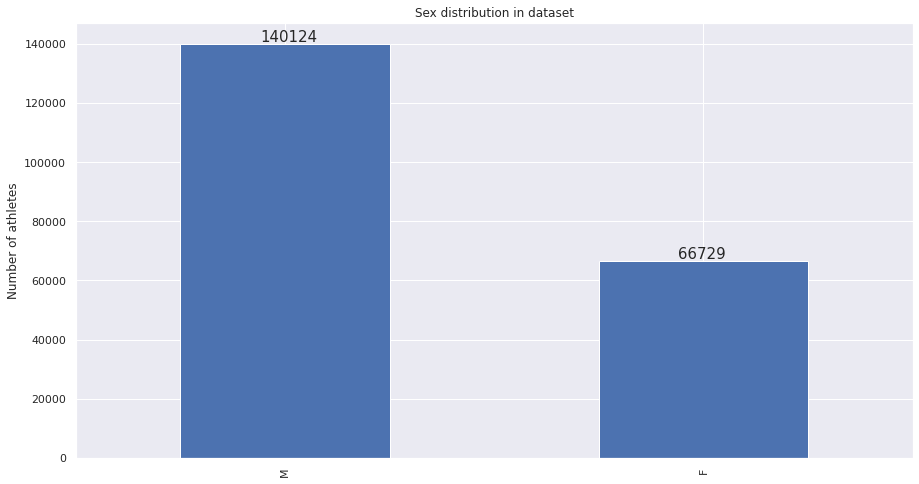

In [ ]:
print("Sex distribution in %")
print(df['Sex'].value_counts(normalize=True) * 100)
print("\n")

ax = df['Sex'].value_counts().plot(kind='bar')
ax.set_title('Sex distribution in dataset')
ax.set_ylabel('Number of athletes')

for i in ax.patches:
    ax.text(i.get_x() + 0.19, 
            i.get_height() + 700, 
            str(round(i.get_height(), 2)), 
            fontsize=15)

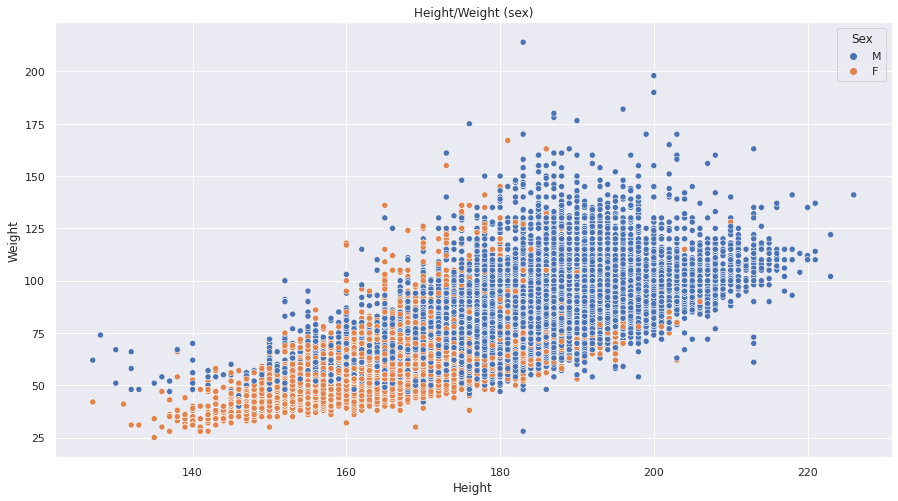

In [ ]:
sns.scatterplot(data=df, 
                x="Height", 
                y="Weight", 
                hue="Sex").set(title='Height/Weight (sex)')
plt.show()

## Simple random sample 

In [ ]:
simple_random_sample = df.sample(frac=0.01, 
                                replace=False, 
                                random_state=1)
simple_random_sample.describe().round()

,Height,Weight
count,2069.0,2069.0
mean,175.0,71.0
std,11.0,14.0
min,139.0,33.0
25%,168.0,61.0
50%,175.0,70.0
75%,182.0,79.0
max,213.0,138.0


Sex distribution in %
M    67.230546
F    32.769454
Name: Sex, dtype: float64




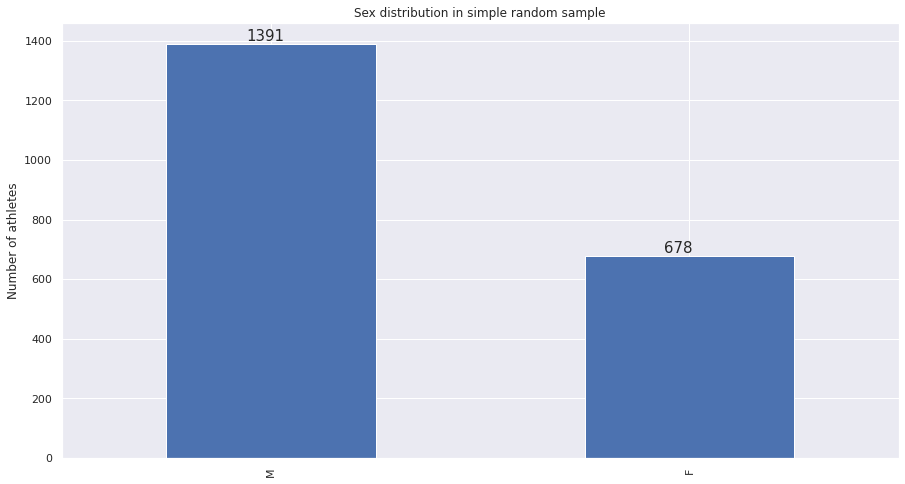

In [ ]:
print("Sex distribution in %")
print(simple_random_sample['Sex'].value_counts(normalize=True) * 100)
print("\n")

ax = simple_random_sample['Sex'].value_counts().plot(kind='bar')
ax.set_title('Sex distribution in simple random sample')
ax.set_ylabel('Number of athletes')

for i in ax.patches:
    ax.text(i.get_x() + 0.19, 
            i.get_height() + 10, 
            str(round(i.get_height(), 2)), 
            fontsize=15)

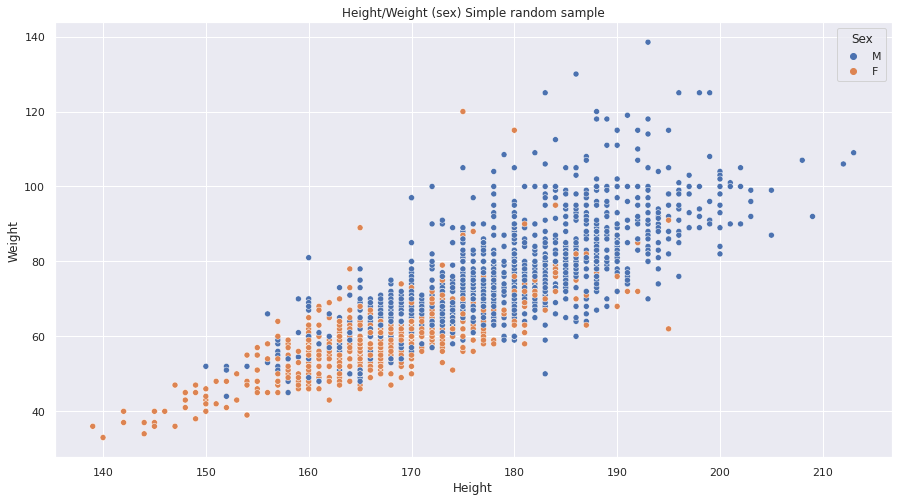

In [ ]:
sns.scatterplot(data=simple_random_sample, 
                x="Height", 
                y="Weight", 
                hue="Sex").set(title='Height/Weight (sex) Simple random sample')
plt.show()

## Systematic sample 

In [ ]:
# Define systematic sampling function
def systematic_sampling(df, step):
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
 
 
# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(df, 100)
systematic_sample.describe().round()

,Height,Weight
count,2069.0,2069.0
mean,175.0,71.0
std,10.0,14.0
min,143.0,33.0
25%,168.0,60.0
50%,175.0,70.0
75%,182.0,79.0
max,215.0,130.0


Sex distribution in %
M    68.100532
F    31.899468
Name: Sex, dtype: float64




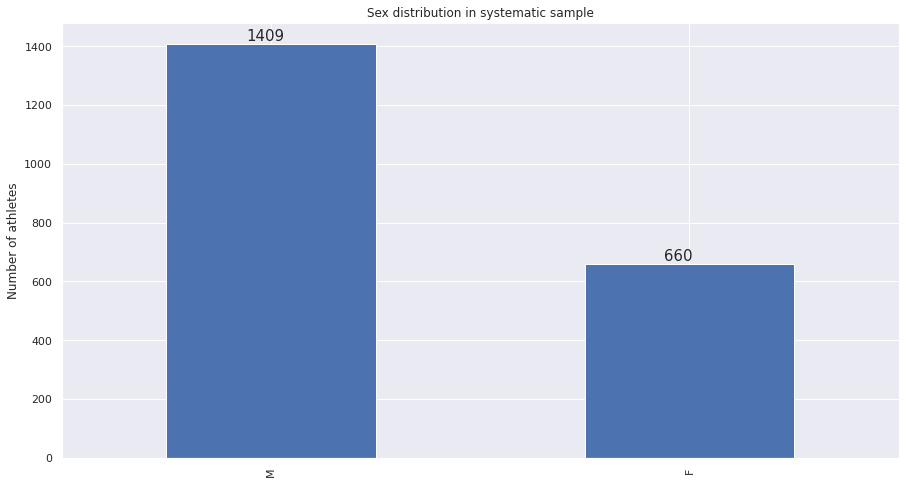

In [ ]:
print("Sex distribution in %")
print(systematic_sample['Sex'].value_counts(normalize=True) * 100)
print("\n")

ax = systematic_sample['Sex'].value_counts().plot(kind='bar')
ax.set_title('Sex distribution in systematic sample')
ax.set_ylabel('Number of athletes')

for i in ax.patches:
    ax.text(i.get_x() + 0.19, 
            i.get_height() + 10, 
            str(round(i.get_height(), 2)), 
            fontsize=15)

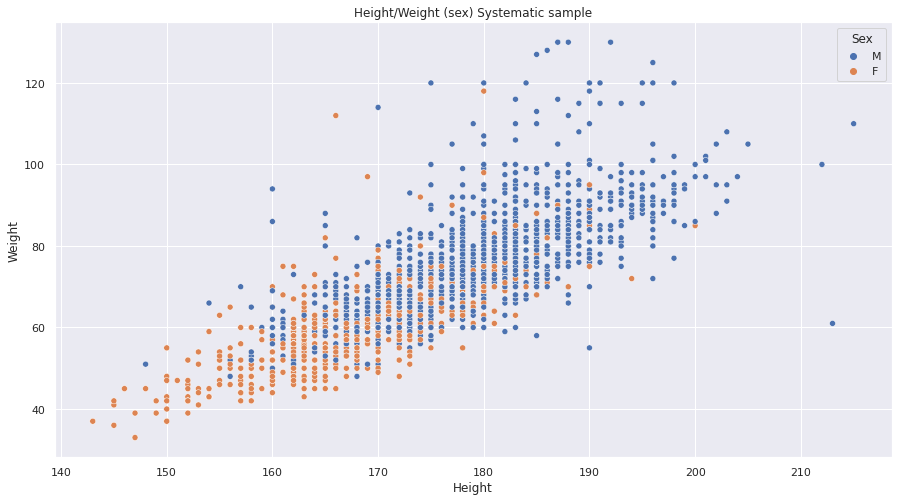

In [ ]:
sns.scatterplot(data=systematic_sample, 
                x="Height", 
                y="Weight", 
                hue="Sex").set(title='Height/Weight (sex) Systematic sample')
plt.show()

# Nivell 2

- Exercici 2

Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).




## Stratified sample

In [ ]:
stratified_sample = df.groupby('Sex', group_keys=False).apply(lambda x: x.sample(int(round(len(df)*0.01)/2)))
stratified_sample.describe().round()

,Height,Weight
count,2068.0,2068.0
mean,173.0,68.0
std,10.0,15.0
min,127.0,30.0
25%,167.0,58.0
50%,173.0,67.0
75%,180.0,76.0
max,212.0,146.0


Sex distribution in %
F    50.0
M    50.0
Name: Sex, dtype: float64




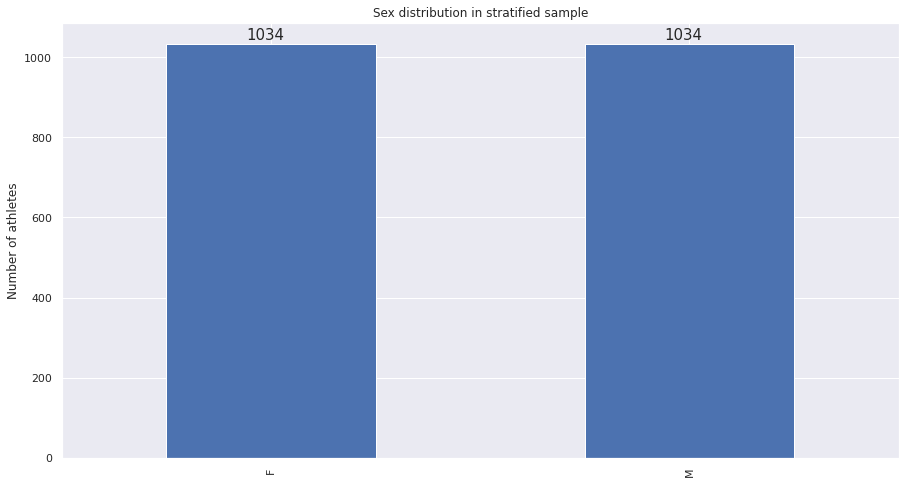

In [ ]:
print("Sex distribution in %")
print(stratified_sample['Sex'].value_counts(normalize=True) * 100)
print("\n")

ax = stratified_sample['Sex'].value_counts().plot(kind='bar')
ax.set_title('Sex distribution in stratified sample')
ax.set_ylabel('Number of athletes')

for i in ax.patches:
    ax.text(i.get_x() + 0.19, 
            i.get_height() + 10, 
            str(round(i.get_height(), 2)), 
            fontsize=15)

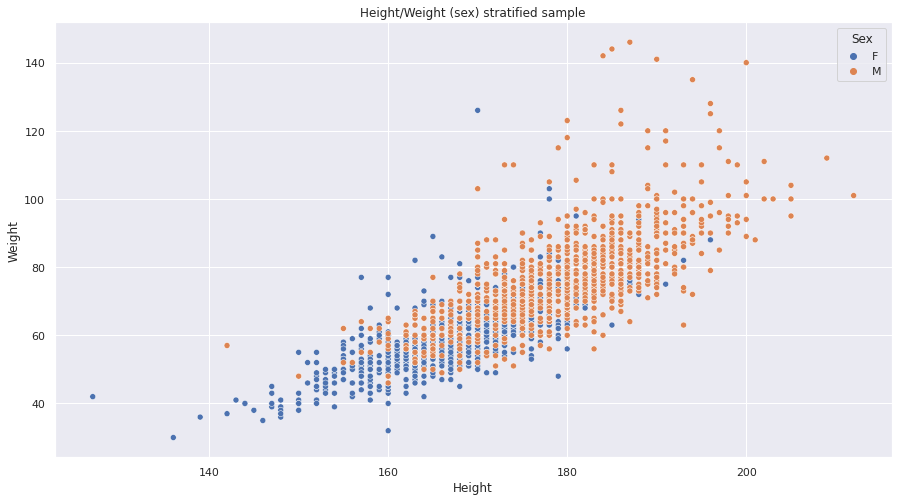

In [ ]:
sns.scatterplot(data=stratified_sample, 
                x="Height", 
                y="Weight", 
                hue="Sex").set(title='Height/Weight (sex) stratified sample')
plt.show()

## SMOTE

In [ ]:
 X = list(zip(df.Height, df.Weight))
 y = list(df.Sex)

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

# concatenate the features and labels into one dataframe
smote_sample = pd.concat([pd.DataFrame(y_sm), pd.DataFrame(X_sm)], axis=1)
smote_sample.columns = ['Sex','Height', 'Weight']
smote_sample.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,Sex,Height,Weight
0,M,180.0,80.0
1,M,170.0,60.0
2,F,185.0,82.0
3,F,185.0,82.0
4,F,185.0,82.0


In [ ]:
smote_sample.describe().round()

,Height,Weight
count,280248.0,280248.0
mean,173.0,68.0
std,11.0,14.0
min,127.0,25.0
25%,166.0,58.0
50%,173.0,66.0
75%,180.0,76.0
max,226.0,214.0


Sex distribution in %
M    50.0
F    50.0
Name: Sex, dtype: float64




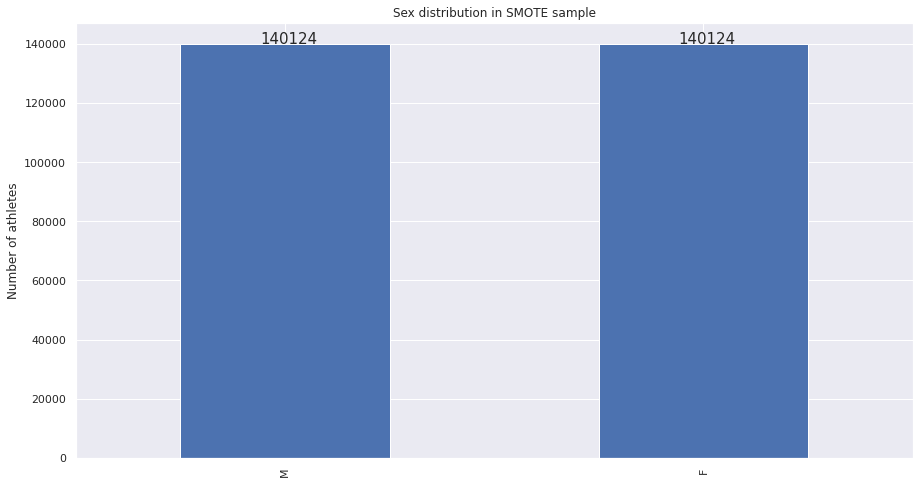

In [ ]:
print("Sex distribution in %")
print(smote_sample['Sex'].value_counts(normalize=True) * 100)
print("\n")

ax = smote_sample['Sex'].value_counts().plot(kind='bar')
ax.set_title('Sex distribution in SMOTE sample')
ax.set_ylabel('Number of athletes')

for i in ax.patches:
    ax.text(i.get_x() + 0.19, 
            i.get_height() + 10, 
            str(round(i.get_height(), 2)), 
            fontsize=15)

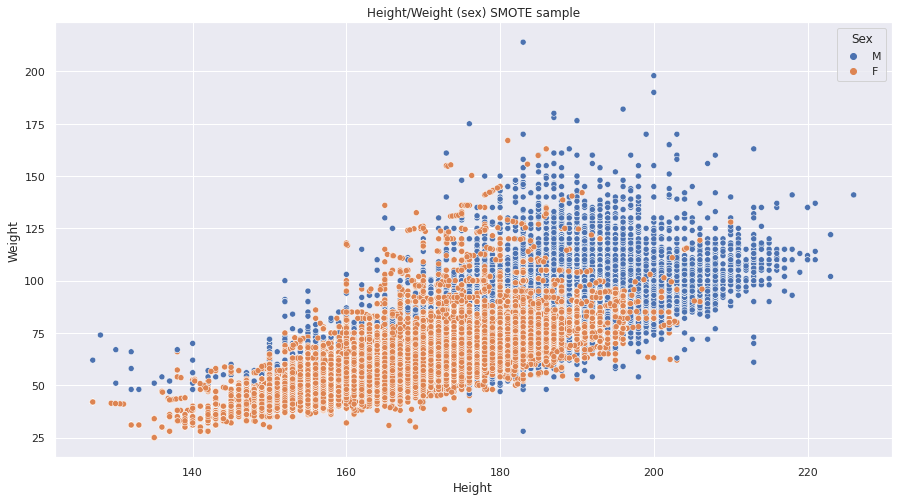

In [ ]:
sns.scatterplot(data=smote_sample, 
                x="Height", 
                y="Weight", 
                hue="Sex").set(title='Height/Weight (sex) SMOTE sample')
plt.show()

# Nivell 3

- Exercici 3

Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

Descripción del algoritmo

- Para los primeros "k" elementos todos se almacenan.

- a partir del elemento k+1 calculamos la p = k/n siendo el n observado hasta el momento.

- Generamos un numero random entre O y 1:

   - Si es menor a p ingresa a la muestra reemplazando a un elemento aleatorio.

   - Si no menor la muestra no cambia.


*Inspirado en la explicación de este [video](https://www.youtube.com/watch?v=Ojz_deSQ_JI&ab_channel=7506-Organizaci%C3%B3ndeDatos)*

In [ ]:
def reservoir_sampling(stream: list, k: int):
    """
    Returns @param k random items from @param stream list.
    """
    #sample the first k elements
    reservoir = stream[:k] 
    n = k
    # for the following items
    for i in range(k,len(stream)): 
        n +=1 
        #probability of entering the sample
        p = k/n 
        r = random.uniform(0, 1)
        if r < p:
            #a random element of the sample is supplanted by  "stream[i]"
            reservoir[random.randint(0,len(reservoir)-1)] = stream[i]
    return reservoir

In [ ]:
# example: sampling of 4 elements from the list [1, 2, 3, 4, 5, 6, 7, 8, 9]

reservoir_sampling(list(range(1, 10)), 4)

[9, 8, 3, 4]

In [ ]:
# sampling of 2068 elements from the dataframe's index list 

reservoir_sample = df.iloc[reservoir_sampling(list(df.index),2068)]

In [ ]:
reservoir_sample.describe().round()

,Height,Weight
count,2068.0,2068.0
mean,175.0,71.0
std,11.0,14.0
min,127.0,30.0
25%,168.0,61.0
50%,175.0,70.0
75%,182.0,79.0
max,213.0,140.0


Sex distribution in %
M    67.504836
F    32.495164
Name: Sex, dtype: float64




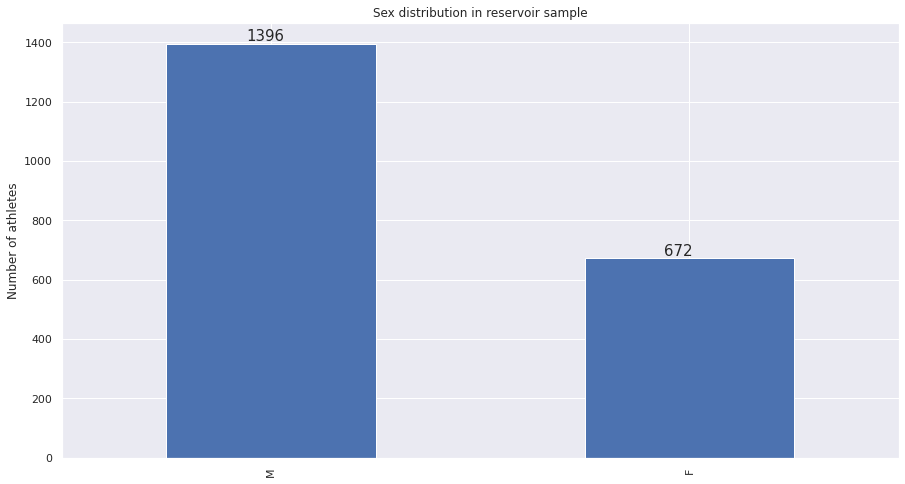

In [ ]:
print("Sex distribution in %")
print(reservoir_sample['Sex'].value_counts(normalize=True) * 100)
print("\n")

ax = reservoir_sample['Sex'].value_counts().plot(kind='bar')
ax.set_title('Sex distribution in reservoir sample')
ax.set_ylabel('Number of athletes')

for i in ax.patches:
    ax.text(i.get_x() + 0.19, 
            i.get_height() + 10, 
            str(round(i.get_height(), 2)), 
            fontsize=15)

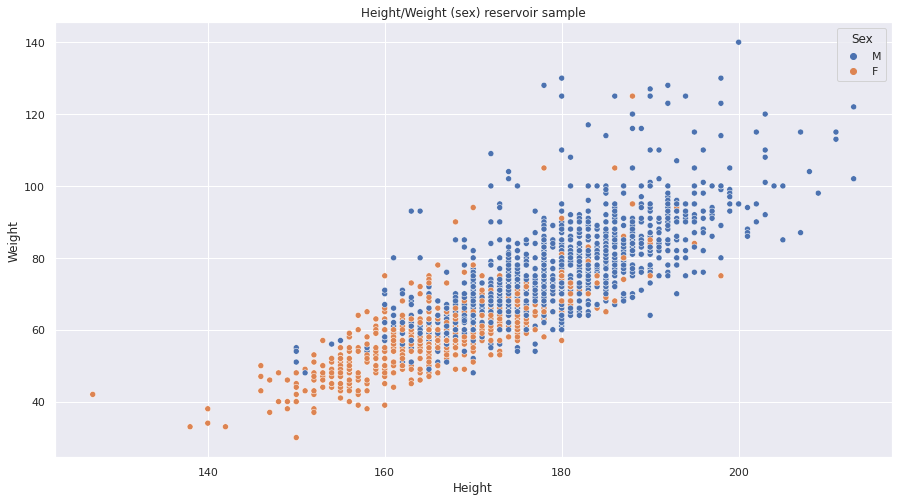

In [ ]:
sns.scatterplot(data=reservoir_sample, 
                x="Height", 
                y="Weight", 
                hue="Sex").set(title='Height/Weight (sex) reservoir sample')
plt.show()

Sex ditribution in simple_random_sample, systematic_sample and reservoir_sample are similar to the population's sex ditribution 


In [ ]:
print("Sex distribution in % in df")
print(df['Sex'].value_counts(normalize=True) * 100)
print("\n")

print("Sex distribution in % in simple_random_sample")
print(simple_random_sample['Sex'].value_counts(normalize=True) * 100)
print("\n")

print("Sex distribution in % in systematic_sample")
print(systematic_sample['Sex'].value_counts(normalize=True) * 100)
print("\n")

print("Sex distribution in % in reservoir_sample")
print(reservoir_sample['Sex'].value_counts(normalize=True) * 100)
print("\n")

Sex distribution in % in df
M    67.740859
F    32.259141
Name: Sex, dtype: float64


Sex distribution in % in simple_random_sample
M    67.230546
F    32.769454
Name: Sex, dtype: float64


Sex distribution in % in systematic_sample
M    68.100532
F    31.899468
Name: Sex, dtype: float64


Sex distribution in % in reservoir_sample
M    67.504836
F    32.495164
Name: Sex, dtype: float64




Sex ditribution in stratified_sample, smote_sample are 50/50 

In [ ]:
print("Sex distribution in % in stratified_sample")
print(stratified_sample['Sex'].value_counts(normalize=True) * 100)
print("\n")

print("Sex distribution in % in smote_sample")
print(smote_sample['Sex'].value_counts(normalize=True) * 100)
print("\n")

Sex distribution in % in stratified_sample
F    50.0
M    50.0
Name: Sex, dtype: float64


Sex distribution in % in smote_sample
M    50.0
F    50.0
Name: Sex, dtype: float64


